# Praca domowa 6

## Zadanie 1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("house_data.csv")

1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [13]:
df1 = df[df["waterfront"] == 1].loc[df.grade >= df.grade.median()]["price"].mean()
df1.round(2)

1784151.7

Odp:1784151.70

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [21]:
df[df["floors"] == 2].bathrooms.median() > df[df["floors"] == 3].bathrooms.median() 

False

Odp: Nie

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [29]:
df[df.lat > df.lat.min() + (df.lat.max() - df.lat.min())/2].groupby("waterfront").grade.quantile([0.25, 0.75])

waterfront      
0           0.25     7.0
            0.75     8.0
1           0.25     8.0
            0.75    10.0
Name: grade, dtype: float64

Odp:Nie ma widoku na wodę: wartość kwartyla 0.25 = 7.0, kwartyla 0.75 = 8.0
Ma widok na wodę: wartość kwartyla 0.25 = 8.0, kwartyla 0.75 = 10.0

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [173]:
zip = df.groupby("zipcode").size().sort_values(ascending=False).head(1).reset_index()
zip = zip.zipcode[0]

IQR = df.loc[df.zipcode == zip].price.quantile(0.75) - df.loc[df.zipcode == zip].price.quantile(0.25)

print(zip)
print(IQR)

98103
262875.0


Odp:Pod kodem pocztowym 98103 jest położonych najwięcej nieruchomosci i rozstęp międzykwartylowy dla ceny nieruchomości położonych pod tym adresem wynosi 262875.

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [197]:
100*(df["sqft_lot"][df["sqft_lot"] < df["sqft_lot15"]].count()\
/df["sqft_lot"].count()).round(4)

39.51

Odp:Ok 39.51 %

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [217]:
srodekNS = df.lat.min() + (df.lat.max()-df.lat.min())/2
srodekWE = df.long.min() + (df.long.max()-df.long.min())/2
northwest_count = df[(df.lat > srodekNS) & (df.long < srodekWE)].id.count()
southeast_count = df[(df.lat < srodekNS) & (df.long > srodekWE)].id.count()

100 * (northwest_count - southeast_count) / southeast_count

18343.529411764706

Odp: O około 18343.53 %

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

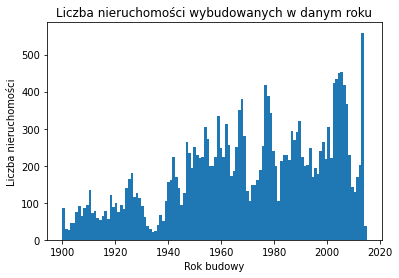

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

#df.groupby("yr_built").id.count()

plt.hist(df.yr_built,bins = 116)
plt.title("Liczba nieruchomości wybudowanych w danym roku")
plt.xlabel("Rok budowy")
plt.ylabel("Liczba nieruchomości")
plt.show()


b)

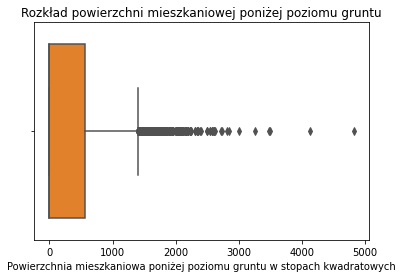

In [261]:
sns.boxplot(data = df, x = "sqft_basement",color='tab:orange')
plt.title("Rozkład powierzchni mieszkaniowej poniżej poziomu gruntu")
plt.xlabel("Powierzchnia mieszkaniowa poniżej poziomu gruntu w stopach kwadratowych")
plt.show()

c)

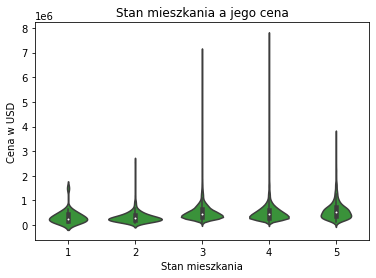

In [259]:
sns.violinplot(df, x='condition', y='price', color='tab:green')
plt.title("Stan mieszkania a jego cena")
plt.xlabel("Stan mieszkania")
plt.ylabel("Cena w USD")
plt.show()
     